
## Arima 분석

ARIMA : Autoregressvie integrated MovingAverage<br>
과거의 데이터를 사용하는 것을 넘어 과거의 데이터가 지니고 있던 추세까지 반영함

<br>
AR(자기상관) : 이전의 값이 이후의 값에 영향을 미치고 있는 상황<br>
MA(이동평균) : 랜덤 변수의 평균값이 지속적으로 증가하거나 감소하는 추세

 

차분 : 비정상성을 정상성으로 만들기 위해, 관측값들의 차이를 계산

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data/arima_data.csv', names = ['day', 'price'])
data['day'] = pd.to_datetime(data['day'],format="%Y-%m-%d")
data.set_index('day', inplace=True)

#Train, Test 데이터 구분
train_len = int(len(data) * 0.8)
training = data[:train_len]
test = data.drop(training.index)


<br>

### [Plot] 시계열 데이터 확인하기

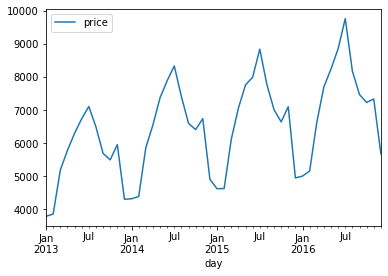

In [2]:
training.plot()
plt.show()

In [3]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(data, regression='ct')

print('ADF Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))

ADF Statistic: -1.6180598959848822
p-value : 0.7852805486099657


<AxesSubplot:xlabel='day'>

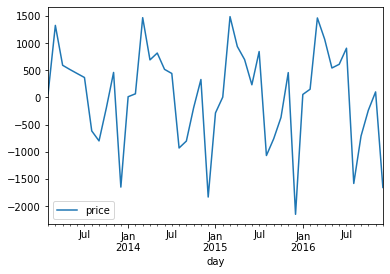

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_data = training.diff(1)
diff_data = diff_data.dropna()

diff_data.plot()


In [5]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(diff_data, regression='ct')

print('ADF Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))

ADF Statistic: -13.318152920970453
p-value : 5.556621043495163e-21


### [Plot] ARIMA(p,d,q)의 파라미터 정하기

ACF plot와 PACF plot을 통해 AR 및 MA의 모수를 추정함
- ACF: Lag에 따른 관측치들 사이의 관련성을 측정하는 함수
- PACF: k 이외의 모든 다른 시점 관측치의 영향력을 배제한 후의 두 관측치의 관련성을 측정하는 함수

<br>


|요약 : AR/MA 모형과 ACF/PCAF 관계 ||  |
|------|---|---|
||  AR(p)  |  MA(q) |
|ACF |점차적으로 감소| 시차q 이후에 0   |
|PACF |시차 p 이후에 0 | 점차적으로 감소 |

      

/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


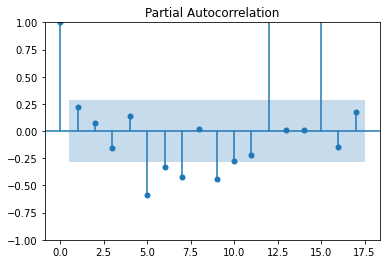

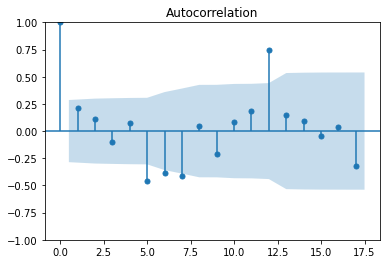

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(diff_data) ## AR (p) 값 확인 가능 

plot_acf(diff_data)  ## MA (q) 값 확인 가능 

plt.show()

<br>

### 모형 만들기 (ARIMA)

> ARIMA(...)

* endog (array_like, optional) : 시계열 y 값<br>
* exog (array_like, optional) : 시계열 이외의 다른 변수 X들<br>
* order ((p,d,q), optional) : 각각 AR, diff, and MA 값 (acf, pacf 그래프 확인 후 설정)<br>
* dates (array_like, optional) : datetime 객체의 배열과 유사한 객체로, <br>
&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; pandas 객체가 endog 또는 exog에 제공되면 DateIndex가 있는 것으로 간주
* freq (('B', 'D', 'W', 'M', 'A', 'Q'), optional) : 시계열의 빈도. 날짜가 제공되는 경우 선택 사항

<br>

> ARIMA().fit(...)

Kalman 필터를 통해 정확한 최대 가능성으로 ARIMA (p, d, q) 모델을 맞춤

* transparams (bool, optional) : 정상성 보장을 위해 매개변수를 변환할지 여부<br>
* method ({'css-mle','mle','css'}, optional) : 최대화할 로그 가능성으로 start_params 를 시작 매개 변수로 사용
* trend ({'c','nc'}, optional) : 상수 포함 여부로 'c'는 상수를 포함하고 'nc'는 상수가 없음

In [7]:
training.price.values

array([3794, 3863, 5190, 5783, 6298, 6739, 7107, 6492, 5693, 5497, 5958,
       4309, 4323, 4391, 5860, 6552, 7370, 7888, 8330, 7401, 6599, 6411,
       6742, 4910, 4626, 4633, 6121, 7060, 7758, 7992, 8838, 7770, 7011,
       6644, 7102, 4952, 5008, 5160, 6624, 7697, 8240, 8851, 9758, 8176,
       7467, 7231, 7334, 5678])

In [8]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

#model = ARIMA(training.price.values, order=(2,1,2),trend='ct')
model = ARIMA(training.price.values, order=(2,1,2))

res = model.fit()

res.summary()

/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/hmc/opt/anaconda3/envs/ADP_Class/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -375.875
Date:                Fri, 14 Jan 2022   AIC                            761.750
Time:                        17:29:01   BIC                            771.000
Sample:                             0   HQIC                           765.231
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3168      0.189     -6.970      0.000      -1.687      -0.947
ar.L2         -0.3192      0.190     -1.683      0.092      -0.691       0.053
ma.L1          1.9711      0.241      8.195      0.000       1.500       2.443
ma.L2          0.9961      0.239      4.168      0.000       0.528       1.465
sigma2      4.447e+05   1.11e-06      4e+11      0.000    4.45e+05    4.45e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.74   Prob(JB):                         0.83
Heteroskedasticity (H):               1.49   Skew:                            -0.21
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.82e+26. Standard errors may be unstable.
"""

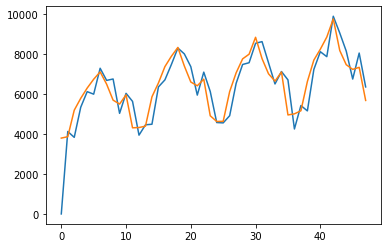

In [9]:
plt.plot(res.predict())
plt.plot(training.price.values)


In [10]:
forecast_data = res.forecast(steps=len(test), alpha=0.1) # 학습 데이터셋으로부터 test 데이터 길이만큼 예측합니다.


pred_y= forecast_data
pred_y

array([5830.86898679, 5508.63458311, 5884.16794377, 5492.51227835,
       5888.38464017, 5492.10603765, 5887.57356294, 5493.3037752 ,
       5886.25524112, 5494.65745963, 5884.89348204, 5496.01856347])

In [11]:
test_y = test.values # 실제 데이터
test_y

array([[5236],
       [5299],
       [6744],
       [7927],
       [8561],
       [8930],
       [9960],
       [8548],
       [7843],
       [7620],
       [7676],
       [5809]])

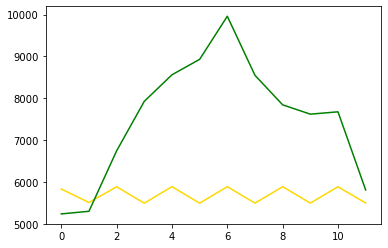

In [12]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프
plt.plot(test_y, color="green") # 실제 가격 그래프

plt.show()

In [13]:
from sklearn.metrics import r2_score
r2_score(pred_y, test_y)

-144.24634638051123

In [14]:
regid = pred_y-test_y

In [15]:
import numpy as np
np.sqrt(np.sum(regid**2)/len(test_y))

8032.441481037844